# Logistic Regression

First, load the standard packages.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model as linMod
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PolyF
%matplotlib inline

Read the 'quidditch_training.csv' file into a Data Frame.

In [2]:
df = pd.read_csv("quidditch_training.csv")
print(df.shape)

(101266, 48)


Get the rows and columns of the Data Frame to help split matrix into training and testing sets.

In [3]:
df1 = df.values
df1 = df1[:,2:]

Cleaning data for poorly structured features and irrelevant data.

In [4]:
for i in range(2):
    df1[:,13] += df1[:,14]
    df1 = np.delete(df1, [14], 1)

In [5]:
colDel = []
row, col = df1.shape

for i in range(row):
    for j in range(col):
        if df1[i][j] == '?':
            if j not in colDel:
                colDel.append(j)

In [6]:
i = 0
while (i != len(colDel)):
    df1 = np.delete(df1, colDel[i], 1)
    i += 1
    

Splitting the data by features and target values.

In [8]:
X = df1[:,:-1]
Y = df1[:,-1]

Creating training/test sets by splitting both X and Y sets. In addition, creating the penalty parameter, c, for the margin.

In [7]:
row, col = df1.shape
rowHalf = row//2

In [9]:
xTrain = X[:rowHalf]
yTrain = Y[:rowHalf]
xTest = X[rowHalf:]
yTest = Y[rowHalf:]

cMat = []
for i in range(11):
    #cMat.append(10**i) ##produces values with 50% accuracy on training/test data
    cMat.append(10**(5-i))

Addressing some format issues found in the last column for the feature matrix -- failure to convert 'Ch' and 'No' as valid inputs.

In [10]:
for i in range(len(X[:,-1])):
    if X[:,-1][i] == 'Ch':
        X[i] = 1
    else:
        X[i] = 0

In [11]:
accTrainLogReg = []

In [12]:
accTestLogReg = []

In [13]:
cLogReg = []

# Lasso (L1) Regularization 

Logistic regression using a lasso regularization.

In [14]:
def logRegLasso(xTrain, yTrain, xTest, yTest, c):
    logReg = linMod.LogisticRegression(C=c, penalty='l1', warm_start=True,solver='saga')
    
    logReg.fit(xTrain, yTrain)
    
    yhatTrain = logReg.predict(xTrain)
    accTrain = np.mean(yhatTrain == yTrain)
    
    accTrainLogReg.append(accTrain)
    print("Train Accuracy = %f"%accTrain)
    
    yhatTest = logReg.predict(xTest)
    accTest = np.mean(yhatTest == yTest)
    
    accTestLogReg.append(accTest)
    print("Test Accuracy = %f"% accTest)

    cLogReg.append(c)

In [15]:
for c in cMat:
    logRegLasso(xTrain, yTrain, xTest, yTest, c)

Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.537515
Test Accuracy = 0.540833


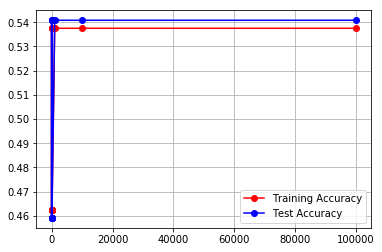

In [16]:
plt.plot(cLogReg, accTrainLogReg, 'ro-')
plt.plot(cLogReg, accTestLogReg, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')

We reset the values for both the trained and tested accuracy matrices as well as the penalty matrix for reuse.

In [17]:
accTrainLogReg.clear()
accTestLogReg.clear()
cLogReg.clear()

# Ridge (L2) Regularization

Logistic regression using a Ridge Regularization.

In [18]:
def logRegRidge(xTrain, yTrain, xTest, yTest, c):
    logReg = linMod.LogisticRegression(C=c, penalty='l2', warm_start=True,solver='saga')
    
    logReg.fit(xTrain, yTrain)
    
    yhatTrain = logReg.predict(xTrain)
    accTrain = np.mean(yhatTrain == yTrain)
    
    accTrainLogReg.append(accTrain)
    print("Train Accuracy = %f"%accTrain)
    
    yhatTest = logReg.predict(xTest)
    accTest = np.mean(yhatTest == yTest)
    
    accTestLogReg.append(accTest)
    print("Test Accuracy = %f"% accTest)

    cLogReg.append(c)

In [19]:
for c in cMat:
    logRegRidge(xTrain, yTrain, xTest, yTest, c)

Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.462485
Test Accuracy = 0.459167
Train Accuracy = 0.462485
Test Accuracy = 0.459167


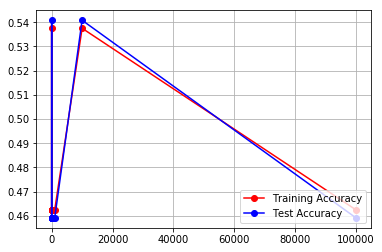

In [ ]:
plt.plot(cLogReg, accTrainLogReg, 'ro-')
plt.plot(cLogReg, accTestLogReg, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')

In [ ]:
accTrainLogReg.clear()
accTestLogReg.clear()
cLogReg.clear()

# Polynomial Feature Transformation

Logistic regression using a polynomial feature transformation.

In [ ]:
poly = PolyF(degree = 2)

In [ ]:
xtTrain = poly.fit_transform(xTrain)
xtTest = poly.fit_transform(xTest)
print(xtTrain.shape, xtTest.shape)

(50633, 780) (50633, 780)


Train Accuracy = 0.537515
Test Accuracy = 0.540833


C:\Users\victo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Accuracy = 0.537515
Test Accuracy = 0.540833


C:\Users\victo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833


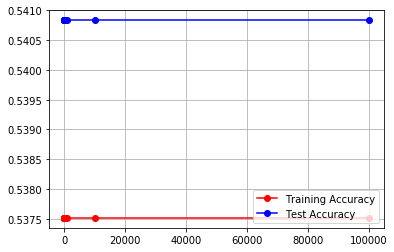

In [ ]:
for c in cMat:
    logRegLasso(xtTrain,yTrain,xtTest,yTest,c)
    
plt.plot(cLogReg, accTrainLogReg, 'ro-')
plt.plot(cLogReg, accTestLogReg, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')

In [ ]:
accTrainLogReg.clear()
accTestLogReg.clear()

In [ ]:
for c in cMat:
    logRegRidge(xtTrain, yTrain, xtTest, yTest,c)
    
plt.plot(cLogReg, accTrainLogReg, 'ro-')
plt.plot(cLogReg, accTestLogReg, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')

Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833


C:\Users\victo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Accuracy = 0.537515
Test Accuracy = 0.540833
